# FoldAR
##### Ian Brown, Tani Cath, Tom Cavey
##### Colorado State University
##### CS567 3D User Interfaces

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Constants
all_columns = ['thumbTip.x', 'thumbTip.y', 'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x', 'thumbCMC.y',
                  'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y', 'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y',
                  'indexTip.x', 'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y', 'indexMCP.x', 'indexMCP.y',
                  'indexTip2.x', 'indexTip2.y', 'indexPIP2.x', 'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x', 'indexMCP2.y',
                  'middleTip.x', 'middleTip.y', 'middlePIP.x', 'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x', 'middleMCP.y',
                  'middleTip2.x', 'middleTip2.y', 'middlePIP2.x', 'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x', 'middleMCP2.y',
                  'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y', 'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y',
                  'ringTip2.x', 'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'ringMCP2.x', 'ringMCP2.y',
                  'littleTip.x', 'littleTip.y', 'littlePIP.x', 'littlePIP.y', 'littleDIP.x', 'littleDIP.y', 'littleMCP.x', 'littleMCP.y',
                  'littleTip2.x', 'littleTip2.y', 'littlePIP2.x', 'littlePIP2.y', 'littleDIP2.x', 'littleDIP2.y', 'littleMCP2.x', 'littleMCP2.y']


finger_columns = ['thumbTip', 'thumbIP', 'thumbMP', 'thumbCMC', 'thumbTip2', 'thumbIP2', 'thumbMP2', 'thumbCMC2',
                  'indexTip', 'indexPIP', 'indexDIP', 'indexMCP', 'indexTip2', 'indexPIP2', 'indexDIP2', 'indexMCP2',
                  'middleTip', 'middlePIP', 'middleDIP', 'middleMCP', 'middleTip2', 'middlePIP2', 'middleDIP2', 'middleMCP2',
                  'ringTip', 'ringPIP', 'ringDIP', 'ringMCP', 'ringTip2', 'ringPIP2', 'ringDIP2', 'ringMCP2',
                  'littleTip', 'littlePIP', 'littleDIP', 'littleMCP', 'littleTip2', 'littlePIP2', 'littleDIP2', 'littleMCP2']

fingertip_columns = [
    'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
    'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
    'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
    'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
    'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
]


In [18]:
# Read all files in directory, returns list of filenames
def get_files(dir='Data'):
    files = [(f) for f in os.listdir(dir) if os.path.isfile(f'{dir}/{f}')]
    return files
    
# Reads individual file, returns datafram and column headers
def read_file(filename: str, dir:str='Data'):
    try:
        df = pd.read_csv(f'{dir}/{filename}')
        # stripping spaces from columns an data...
        df.columns = df.columns.str.strip()
        df:pd.DataFrame = df.map(lambda x: x.strip() if isinstance(x, str) else x)
        return df, df.columns    
    except:
        print("Error reading file")
        return None

In [43]:
def get_timestamp(frame):
    date = frame['date'].iloc[0]
    time = frame['time'].iloc[0]
    timestamp = f'{date} {time}'
    timestamp_datetime = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
    
    return timestamp_datetime

def get_frameMean(frame):
    # Euclidean distances of all points
    distances = np.sqrt(np.diff(frame[all_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)
    frame_mean = np.mean(distances)
    return frame_mean

def get_tipMean(frame):
    # Euclidean distances of fingertips
    tipDistances = np.sqrt(np.diff(frame[fingertip_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)
    tip_mean = np.mean(tipDistances)
    return tip_mean

def get_frametime_data(frametimes):
    mean = np.mean(frametimes)
    minimum = np.min(frametimes)
    maximum = np.max(frametimes)
    median = np.median(frametimes)
    first_quartile = np.quantile(frametimes, 0.25)
    thrid_quartile = np.quantile(frametimes, 0.75)
    iqr = thrid_quartile - first_quartile
    
    data = {'mean': mean, 'minimum': minimum, 'maximum': maximum, 'median': median, 'Q1': first_quartile, 'Q3': thrid_quartile, 'IQR': iqr}
    
    return data
    


In [51]:
def process_frames(data, print:bool = True):
    frame_means  = []
    tip_means    = []
    finger_means = []
    frametimes   = []

    t0:datetime = None
    # for each frame in dataframe
    for i, frame in data.groupby('frame'):
        timestamp = get_timestamp(frame)
        frame_mean = get_frameMean(frame)
        tip_mean = get_tipMean(frame)
        frame_means.append(frame_mean)
        tip_means.append(tip_mean)
        
        if i != 0:
            frametime:datetime = (timestamp - t0).microseconds/1000
            frametimes.append(frametime)
            
        t0 = timestamp


        if print:
            print(f'Frame {i}:')
            print(f'Timestamp: {timestamp}')
            print(f'Mean Distance: {frame_mean:.2f}')
            print(f'Frametime: {frametime} ms')
        # print(f'Minimum Distance: {frame_min:.2f}')
        # print(f'Maximum Distance: {frame_max:.2f}')
        # print(f'Standard Deviation: {frame_std:.2f}')
            print()
        
    return frame_means, tip_means, frametimes


In [9]:
def plot_frames(frame_means, tip_means):
    window_size = 5
    all_moving_average = np.convolve(frame_means, np.ones(window_size)/window_size, mode='valid')
    tips_moving_average = np.convolve(tip_means, np.ones(window_size)/window_size, mode='valid')
        
    plt.plot(range(1, len(tip_means) + 1), frame_means, marker='o', linestyle='-', color='b')
    plt.xlabel('Frame #')
    plt.ylabel('Mean Distance')
    plt.title('Mean Distance Across Frames')
    plt.show()

    plt.plot(range(1, len(tip_means) + 1)[:len(tips_moving_average)], tips_moving_average, marker='o', linestyle='-', color='b')
    plt.xlabel('Frame #')
    plt.ylabel('Mean Distance')
    plt.title('Smoothed Mean Distance Across Frames')
    plt.show()

    plt.plot(range(1, len(frame_means) + 1), frame_means, marker='o', linestyle='-', color='g')
    plt.xlabel('Frame #')
    plt.ylabel('Mean Distance')
    plt.title('Mean Distance Across Frames')
    plt.show()

    plt.plot(range(1, len(frame_means) + 1)[:len(all_moving_average)], all_moving_average, marker='o', linestyle='-', color='g')
    plt.xlabel('Frame #')
    plt.ylabel('Mean Distance')
    plt.title('Smoothed Mean Distance Across Frames')
    plt.show()

    start_frame, end_frame = 50, 50
    trimmed_tip_means = tip_means[start_frame:-end_frame]
    trimmed_tips_moving_average = tips_moving_average[start_frame:end_frame + len(trimmed_tip_means)]

    plt.plot(range(start_frame + 1, start_frame + 1 + len(trimmed_tip_means)), trimmed_tips_moving_average, marker='o', linestyle='-', color='b')
    plt.xlabel('Frame #')
    plt.ylabel('Mean Distance')
    plt.title('Tips Only Smoothed Mean Distance Across Frames')
    plt.show()

In [53]:
def plot_path(data):
    point_to_plot = 'thumbTip'
    x_coords = data[f'{point_to_plot}.x']
    y_coords = data[f'{point_to_plot}.y']

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

    plt.title(f'Path of {point_to_plot}')
    plt.colorbar(label='Frame Number')
    # plt.grid(True)
    plt.show()


    point_to_plot = 'littleTip'
    x_coords = data[f'{point_to_plot}.x']
    y_coords = data[f'{point_to_plot}.y']

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

    plt.title(f'Path of {point_to_plot}')
    plt.colorbar(label='Frame Number')
    # plt.grid(True)
    plt.show()

In [36]:
# files = get_files()

# for f in files:
#     print(f)
#     data = read_file(filename=f)[0]
#     print(data)


In [52]:
files = ['sessionData-102-0.csv', 'sessionData-205-0.csv', 'sessionData-301-0.csv']

for f in files:
    print(f'-----\'{f}\' frametime data-----')
    dataframe = read_file(f)[0]
    fm, tm, ft = process_frames(dataframe, print=False)
    ft_data = get_frametime_data(ft)

    for k,v in ft_data.items():
        print(f'{k}: {v}')
    

-----'sessionData-102-0.csv' frametime data-----
mean: 35.324786324786324
minimum: 25.0
maximum: 267.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
-----'sessionData-205-0.csv' frametime data-----
mean: 33.817843866171
minimum: 27.0
maximum: 134.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0
-----'sessionData-301-0.csv' frametime data-----
mean: 255.9
minimum: 215.0
maximum: 477.0
median: 237.0
Q1: 234.75
Q3: 243.25
IQR: 8.5


mean: 33.35446685878963
minimum: 27.0
maximum: 39.0
median: 33.0
Q1: 33.0
Q3: 34.0
IQR: 1.0


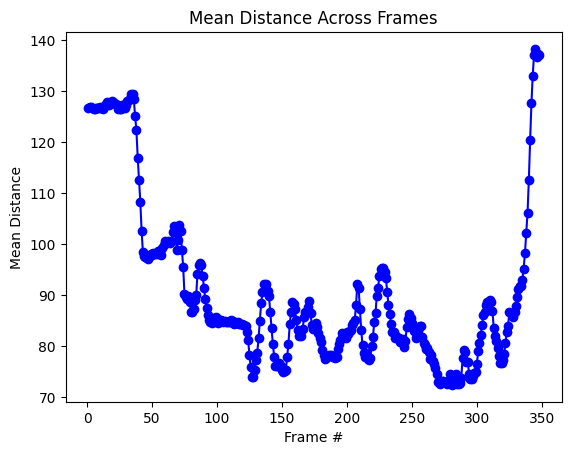

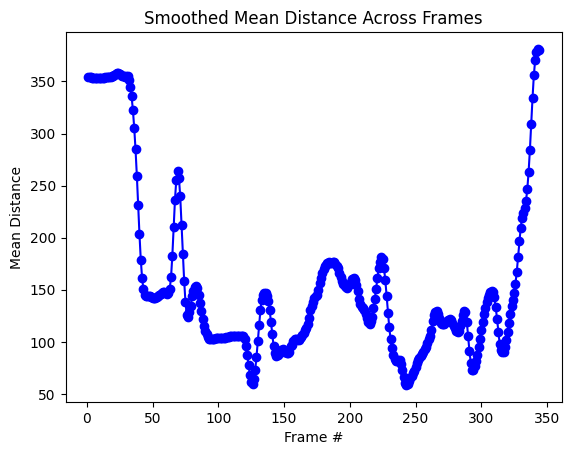

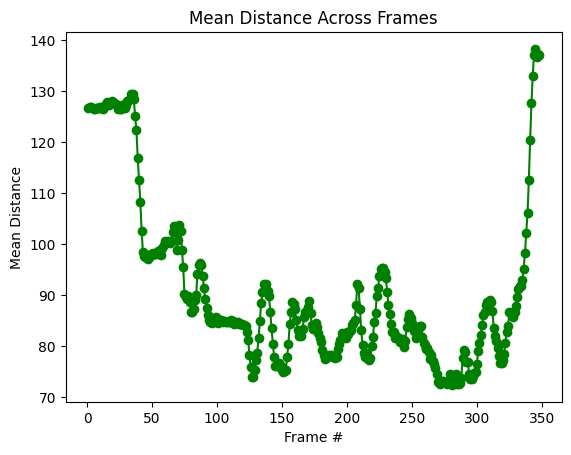

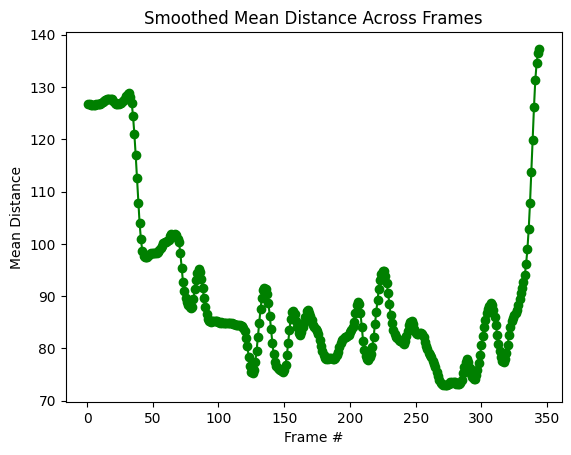

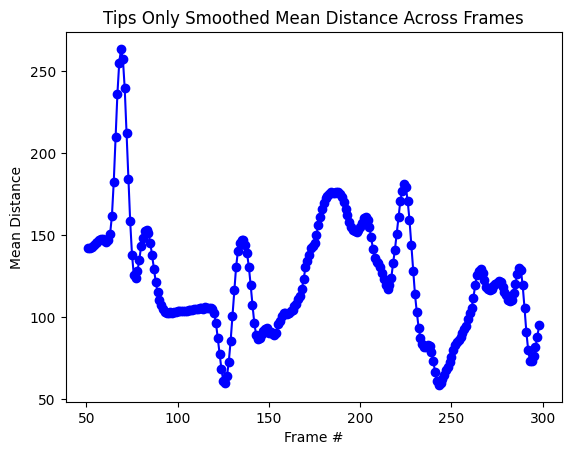

In [55]:
dataframe = read_file('sessionData-104-0.csv')[0]
fm, tm, ft = process_frames(dataframe, print=False)
ft_data = get_frametime_data(ft)

for k,v in ft_data.items():
    print(f'{k}: {v}')

plot_frames(fm,tm)

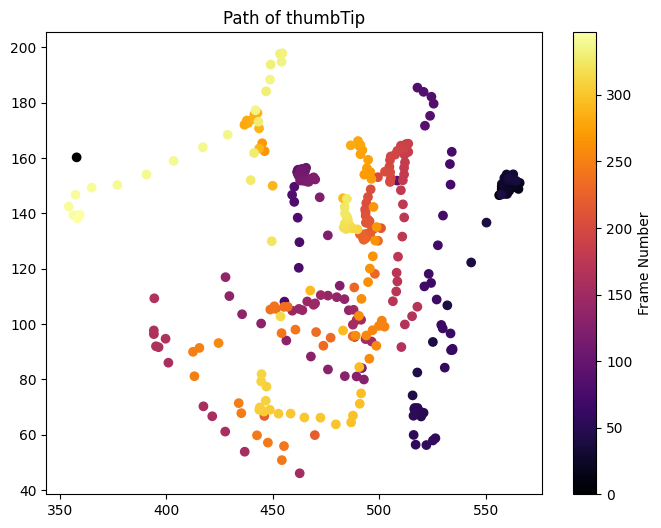

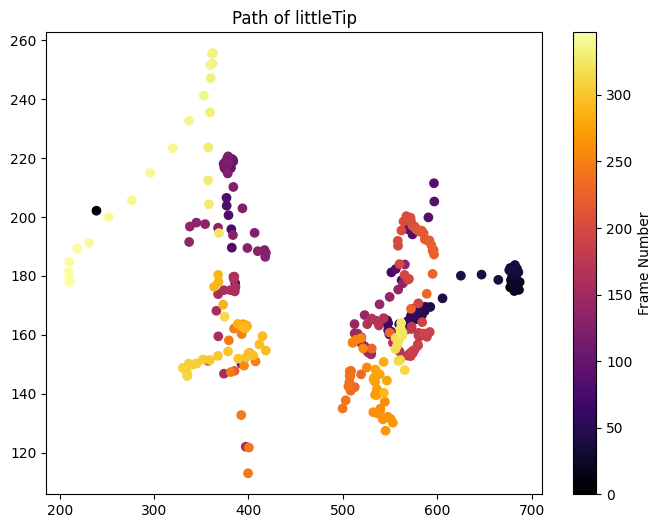

In [56]:
plot_path(dataframe)

In [ ]:
# read and remove starting and ending frames from CSV
# (this contains the starting and ending positions of the experiment)
df = pd.read_csv('Data/sessionData-200_7-0.csv')
df = df[50:-55]

# strip any whitespace from columns and data
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# columns to plot
fingertip_columns = ['littleTip', 'littleTip2']

# pairwise euclidean distances (using fingertips)
for fingertip1 in fingertip_columns:
    for fingertip2 in fingertip_columns:
        if fingertip1 != fingertip2:
            df[f'{fingertip1}_{fingertip2}_distance'] = np.sqrt((df[f'{fingertip1}.x'] - df[f'{fingertip2}.x'])**2 +
                                                                (df[f'{fingertip1}.y'] - df[f'{fingertip2}.y'])**2)
#plots
for fingertip1 in fingertip_columns:
    for fingertip2 in fingertip_columns:
        if fingertip1 != fingertip2:
            distance_column = f'{fingertip1}_{fingertip2}_distance'
            plt.plot(df['frame'], df[distance_column], label=f'{fingertip1} to {fingertip2}')

plt.xlabel('Frame #')
plt.ylabel('pairwise distance')
plt.title('pairwise distances of fingertips')
plt.show()